## **House Prices 데이터 시각화**

Titanic 데이터셋에 비해서 House Prices은 Features의 개수가 많아 다루기 까다롭다. 

이러한 House Prices 데이터셋에 대하여 최대한 시각화를 다양한 방면으로 진행해 보았다. 
<br><br>

0. 데이터셋 및 결측치 확인

1. 타겟열 시각화

2. 상관행렬 시각화

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
plt.rcParams['font.family'] = 'Malgun Gothic'
matplotlib.rcParams['font.family'] = 'Malgun Gothic'

In [2]:
from scipy import stats
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler

### **0. 데이터셋 및 결측치 확인**

데이터셋의 기본적인 정보들을 확인합니다. 

데이터셋에는 총 81개의 column이 존재함을 확인할 수 있습니다. 즉, 타겟열을 제외하고 80개의 Features가 존재합니다. 

이 중 다수의 결측치를 포함하는 Feature들이 있습니다. 각 열 별로 결측치를 확인해 줍니다. 


In [3]:
df = pd.read_csv("C:/Users/UserPC/OneDrive/01 데이터셋/houseprice_train.csv")

print(df.columns)
df.head()

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
# df에서 각 열 별 결측치 개수 확인

# df.isnull()sum() 활용용
total = df.isnull().sum().sort_values(ascending= False)
percent = ((df.isnull().sum()) / 1460).sort_values(ascending= False)    # 전체 데이터 개수 중 결측치 개수

missing_df = pd.concat([total, percent], axis=1, keys = ['Total','Percent'])
missing_df.head(10)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
MasVnrType,872,0.597260
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
GarageCond,81,0.055479
GarageType,81,0.055479


결측치의 비율이 50%가 넘는 변수들은 삭제해 주었다. 

In [6]:
delete_cols = missing_df[missing_df['Percent']>= 0.5]
delete_cols = list(delete_cols.index)

df.drop(columns = delete_cols, inplace= True)
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [27]:
# 추가로, 타겟열과 관계없는 Id 열도 삭제해 주었다. 

df.drop(columns = 'Id', inplace=True)
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,3,65.0,8450,1,3,3,0,4,0,...,0,0,0,0,0,2,2008,8,4,208500
1,20,3,80.0,9600,1,3,3,0,2,0,...,0,0,0,0,0,5,2007,8,4,181500
2,60,3,68.0,11250,1,0,3,0,4,0,...,0,0,0,0,0,9,2008,8,4,223500
3,70,3,60.0,9550,1,0,3,0,0,0,...,272,0,0,0,0,2,2006,8,0,140000
4,60,3,84.0,14260,1,0,3,0,2,0,...,0,0,0,0,0,12,2008,8,4,250000


### **1. 타겟열 시각화**

House Price와 같이 복잡한 데이터셋을 받아 시각화를 통해 데이터를 확인하려고 할 때는,

타겟열인 SalePrice에 대해 가장 먼저 살펴보는 것이 먼저이다.

타겟열인 SalePrice는 숫자형 데이터이다. 수치형 데이터의 경우 가장 기본적으로 히스토그램과 박스플롯을 통해 시각화 가능하다. 

In [8]:
# 일단 타겟열인 SalePrice열은 숫자형 데이터이다. 
# 이 숫자형 데이터에 대해 기본적인 통계량을 확인해준다. 

df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

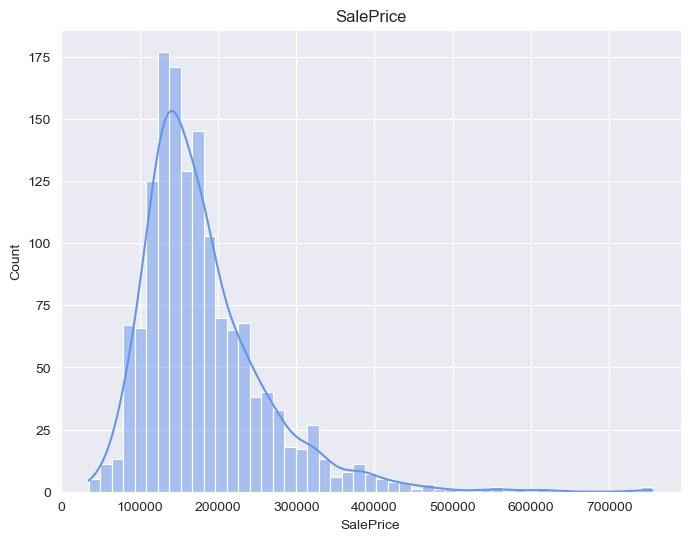

In [9]:
# 타겟열의 히스토그램을 그려보면 다음과 같다. 

plt.figure(figsize=(8,6))
sns.set_style("darkgrid")  
sns.histplot(df['SalePrice'], color='cornflowerblue', edgecolor='white', kde= True)

plt.title('SalePrice')
plt.show()

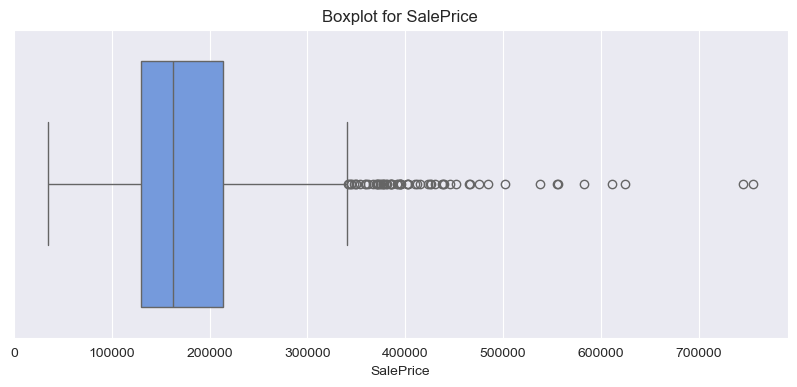

In [18]:
# 타겟열의 박스플롯을 그려주면 다음과 같다.  
plt.figure(figsize=(10,4))

sns.boxplot(x = df['SalePrice'], color='cornflowerblue')
plt.title('Boxplot for SalePrice')

plt.show()

### **2. 상관행렬(Correlation Matrix) 시각화**

House Price 데이터셋의 경우 Feature의 개수가 매우 많다. 

이러한 다차원 데이터셋의 경우 전처리 혹은 피쳐 엔지니어링 과정에서 변수들 사이 상관관계를 활용하는 경우가 많아서,

우선 상관행렬 시각화를 통해 이를 시각적으로 확인하는 것이 좋다. 

In [11]:
# 상관계수 행렬을 그리기 위해 object형 데이터에 대해 인코딩 진행

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

object_cols = df.select_dtypes(include=['object']).columns

for col in object_cols:
    df[col] = le.fit_transform(df[col])

df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,65.0,8450,1,3,3,0,4,...,0,0,0,0,0,2,2008,8,4,208500
1,2,20,3,80.0,9600,1,3,3,0,2,...,0,0,0,0,0,5,2007,8,4,181500
2,3,60,3,68.0,11250,1,0,3,0,4,...,0,0,0,0,0,9,2008,8,4,223500
3,4,70,3,60.0,9550,1,0,3,0,0,...,272,0,0,0,0,2,2006,8,0,140000
4,5,60,3,84.0,14260,1,0,3,0,2,...,0,0,0,0,0,12,2008,8,4,250000


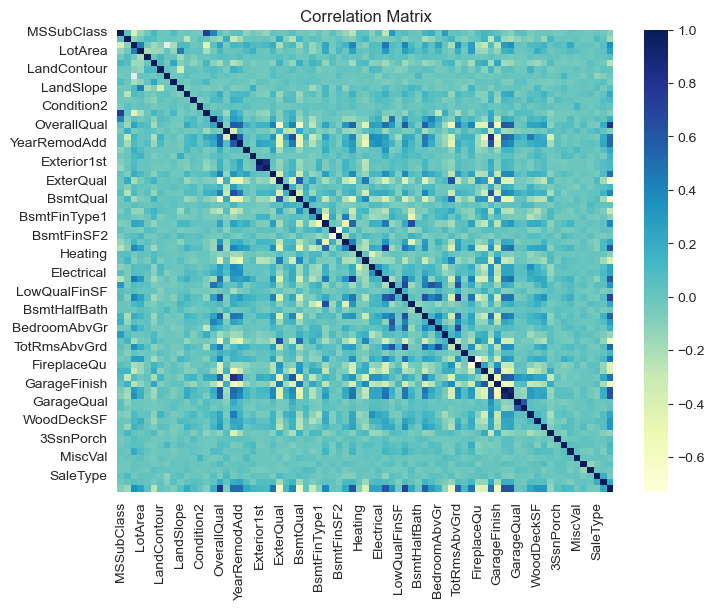

In [28]:
# 상관계수 행렬을 그리는 코드

corr_matrix = df.corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=False, cmap='YlGnBu', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

여기서 Feature의 개수가 너무 많아 상관행렬 시각화 결과 정확한 정보를 알 수 없는 상황이 발생한다. 

이를 해결하기 위해 상관계수가 가장 높은 10개 Feature만을 추출하여 이들 간의 상관행렬을 그려보자.

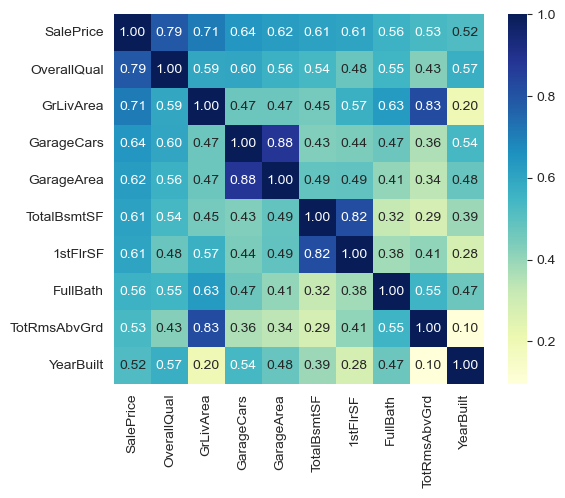

"\n\nk = 10 #number of variables for heatmap\ncols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index\ncm = np.corrcoef(df_train[cols].values.T)\nsns.set(font_scale=1.25)\nhm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)\nplt.show()\n"

In [ ]:
# 상위 10개 Feature 추출

cols = corr_matrix.nlargest(10, 'SalePrice')['SalePrice'].index
corr_2 = np.corrcoef(df[cols].values.T)           # correlation coefficient를 구하는 코드

corr_matrix2 = sns.heatmap(corr_2, cbar=True, annot=True, square=True, fmt='.2f',cmap='YlGnBu',     # cmap='Y1GnBu'는 색상 옵션.
                           yticklabels = cols.values, xticklabels= cols.values)
plt.show()

상관행렬에서 타겟열인 SalePrice와의 상관관계를 살펴봅시다. 

SalePrice와 상관계수가 가장 높은 변수들은 OverallQual(0.79), GrLivArea(0.71), TotalBsmtSF(0.61)입니다. 
<br><br>

그리고 Feature간 강한 상관관계를 가지는 쌍들이 있는지를 살피는 것도 중요합니다. 이 정보를 통해 피쳐 엔지니어링을 진행할 것이기 때문이죠.

예를 들어 GarageCars와 GarageArea의 경우 이 둘이 큰 상관관계를 보이므로, 하나의 변수로 합치는 것이 좋습니다.

이와 같이 유의미한 Feature들을 산점도로 시각화하면 다음과 같습니다. 

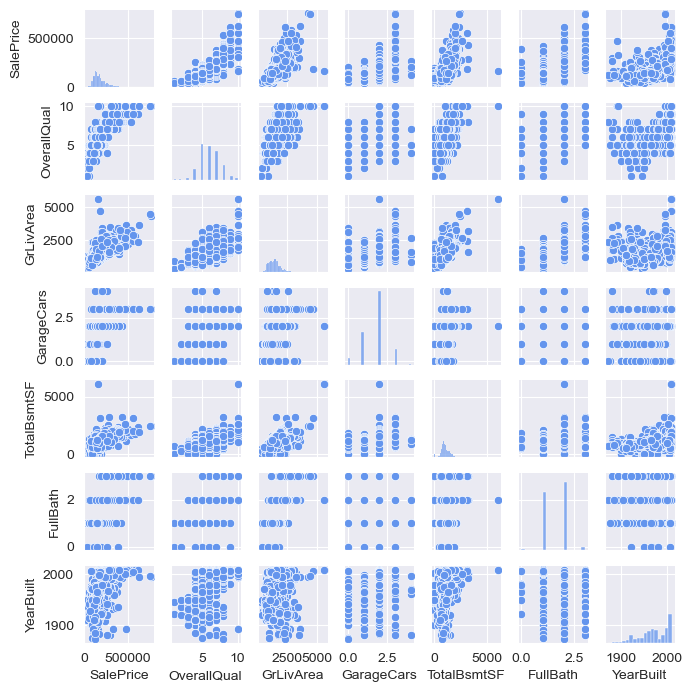

In [ ]:
# seaborn에서 제공하는 pairplot을 이용합니다. 

scatter_cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']      # 그리고 싶은 Features 열의 리스트.

sns.pairplot(df[scatter_cols], height = 1,      # 여기서 height로 크기 조정 가능.
             diag_kws={'color':'cornflowerblue'}, plot_kws={'color':'cornflowerblue'})
plt.show()

### **3. 각 Feature의 시각화**

위에서 타겟열인 SalePrice에 대해 가장 높은 상관관계를 보이는 열이 OverallQual(0.79), GrLivArea(0.71), TotalBsmtSF(0.61)임을 확인하였습니다. 

각 열에 대한 정보들을 적절한 방법으로 시각화해 보겠습니다. 

이때 각 열에 대한 정보는 Kaggle에서 확인 가능하며, data_description.txt 파일도 별도로 제공합니다. 
<br><br>

#### **3.1. OverallQual열의 시각화**

OverallQual에 대한 설명을 찾아보면 'OverallQual: Overall material and finish quality'임을 확인 가능합니다. 

적절한 방법으로 이를 시각화해 봅시다. 

In [36]:
df['OverallQual'].unique()

array([ 7,  6,  8,  5,  9,  4, 10,  3,  1,  2], dtype=int64)

C:\Users\UserPC\AppData\Local\Temp\ipykernel_17436\1669815884.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=overallqual_counts.index, y=overallqual_counts.values,


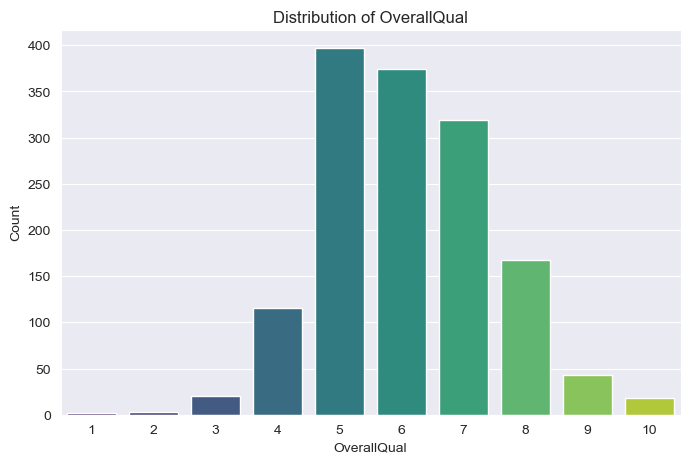

In [51]:
# 막대그래프를 그리려면 일단 범주별로 몇 개 있는지 세어줘야 합니다. 

overallqual_counts = df['OverallQual'].value_counts().sort_index()

plt.figure(figsize=(8, 5))
sns.barplot(x=overallqual_counts.index, y=overallqual_counts.values, 
            palette=sns.color_palette('viridis', len(overallqual_counts)), edgecolor = None)
plt.xlabel('OverallQual')
plt.ylabel('Count')
plt.title('Distribution of OverallQual')

plt.show()

위에서 살펴본 것은 OverallQual에 대한 기본적인 정보들이고,

저희가 주목해야 할 것은 타겟열인 SalePrice와 OverallQual의 관계이므로, 이를 좀 더 직관적인 방법으로 시각화하여 보았습니다. 

Overall별로 SalePrice와 이루는 값들을 박스플롯으로 나타내면 다음과 같습니다.

C:\Users\UserPC\AppData\Local\Temp\ipykernel_17436\3897073769.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  fig = sns.boxplot(x='OverallQual', y="SalePrice", data=data, palette='viridis')


(-0.5, 9.5, 0.0, 800000.0)

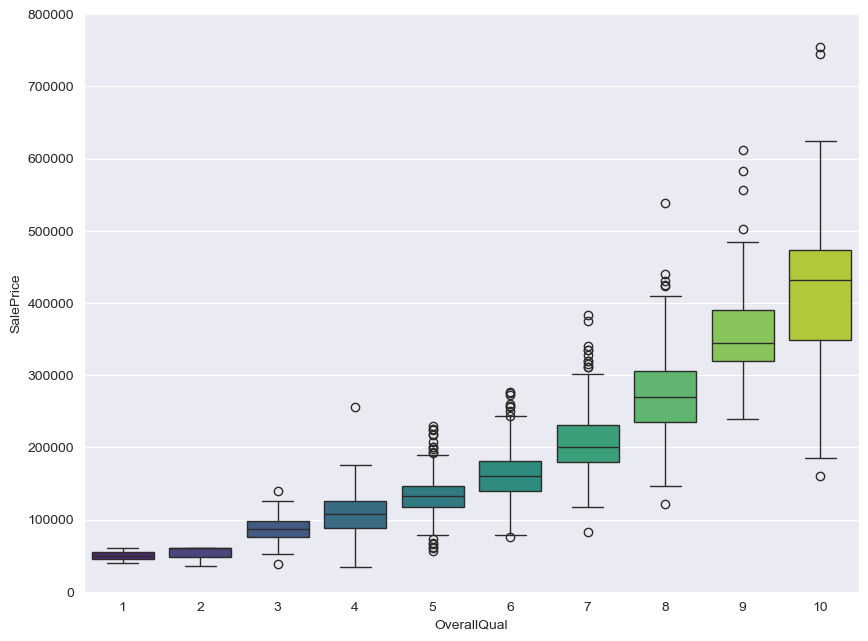

In [50]:
# SalePrice와의 박스플롯 그리기

data = pd.concat([df['SalePrice'], df['OverallQual']], axis=1)

plt.figure(figsize=(10,7.5))

fig = sns.boxplot(x='OverallQual', y="SalePrice", data=data, palette='viridis')
fig.axis(ymin=0, ymax=800000)

#### **3.2. GrLivArea열의 시각화**

GrLivArea에 대한 설명을 찾아보면 'GrLivArea: Above grade (ground) living area square feet'임을 확인 가능합니다. 

적절한 방법으로 이를 시각화해 봅시다.
<br><br>

GrLivArea는 수치형 데이터이므로, 가장 쉽게 describe()를 통해 통계량을 확인할 수 있습니다.

In [52]:
df['GrLivArea'].describe()

count    1460.000000
mean     1515.463699
std       525.480383
min       334.000000
25%      1129.500000
50%      1464.000000
75%      1776.750000
max      5642.000000
Name: GrLivArea, dtype: float64

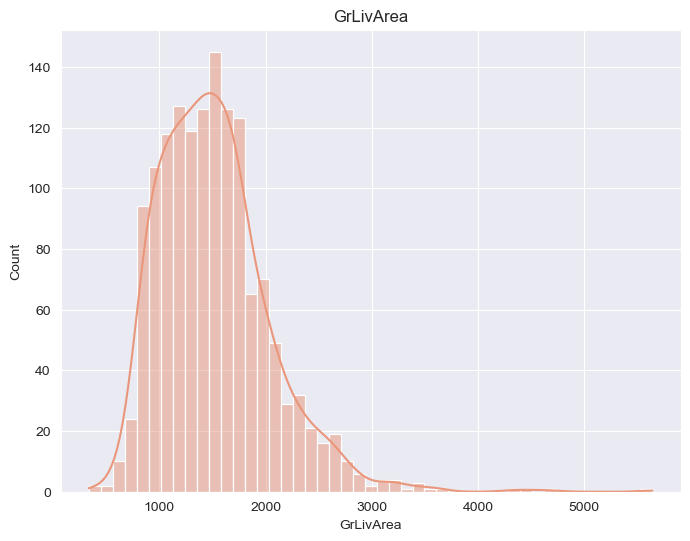

In [ ]:
# 이 변수의 대략적인 분포를 살펴보기 위해 히스토그램을 그려봅시다. 

plt.figure(figsize=(8,6))
sns.set_style("darkgrid")  
sns.histplot(df['GrLivArea'], color='darksalmon', edgecolor='white', kde= True)

plt.title('GrLivArea')
plt.show()

이 또한 마찬가지로 변수 그 자체의 분포도 중요하지만,

우리가 중점적으로 살펴봐야 할 것은 타겟열 SalePrice와의 관계입니다. 이를 산점도로 표시해 보았습니다.

<Axes: xlabel='GrLivArea', ylabel='SalePrice'>

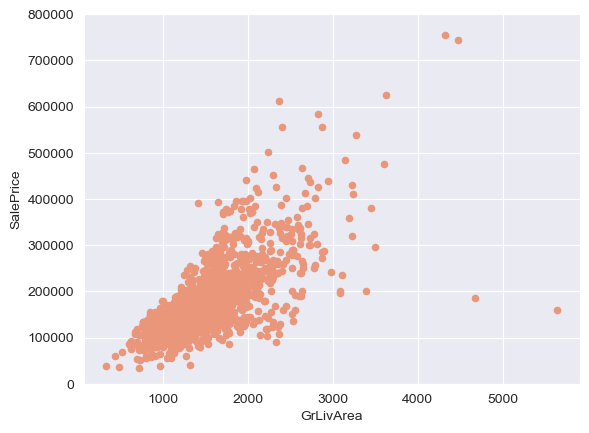

In [56]:
# 산점도 그리기

data = pd.concat([df['SalePrice'], df['GrLivArea']], axis=1)
data.plot.scatter(x='GrLivArea', y='SalePrice', ylim=(0,800000), color='darksalmon')


In [58]:
corr_grlivarea = data.corr().loc['SalePrice', 'GrLivArea']

print('SalePrice와 GrLivArea와의 상관계수:',corr_grlivarea)

SalePrice와 GrLivArea와의 상관계수: 0.7086244776126517


위의 산점도 그래프를 보면 둘의 상관관계가 어느 정도 존재함을 확인할 수 있습니다.

산점도가 제법 선형적으로 그려지고 있죠?

둘의 상관계수를 위의 코드를 통해 계산해 보았습니다. 보통은 0.7을 넘으면 유의미한 상관관계가 있다고 봅니다.

### **과제**

위에서 타겟열 SalePrice와 상관관계가 높은 열로 OverallQual(0.79), GrLivArea(0.71), TotalBsmtSF(0.61) 의 세 열을 꼽았습니다.

이 중 두 개의 열을 시각화해 보았습니다. 

남은 열 TotalBsmtSF를 적절한 방법으로 시각화하는 코드를 적어보는 것이 과제입니다.

#### **과제 힌트**

TotalBsmtSF에 대한 설명을 살펴보면 'TotalBsmtSF: Total square feet of basement area'입니다.즉 지하실 면적을 의미합니다.

이는 숫자형 데이터이므로, 위희 GrLivArea와 비슷한 방법으로 시각화하는 것이 좋겠습니다.

이 열에 대한 기초 통계량을 먼저 살펴보고, 시각화를 진행해 보세요!